<a href="https://colab.research.google.com/github/Nyma-03/Balanced_Dataset_For_Breast-Cancer-Classification/blob/main/Balanced_Dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns # statistical data visualization
get_ipython().run_line_magic('matplotlib', 'inline')
from google.colab import drive


In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/Machine Learning/Breast_cancer_data.csv")
df1.head(150)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
145,11.90,14.65,78.11,432.8,0.11520,1
146,11.80,16.58,78.99,432.0,0.10910,0
147,14.95,18.77,97.84,689.5,0.08138,1
148,14.44,15.18,93.97,640.1,0.09970,1


### 🤖 Why Do We Need Training Algorithms in Machine Learning?

Training algorithms are essential in machine learning because they allow models to **learn patterns** from data. During training, an algorithm analyzes input data and adjusts internal parameters (like weights in a neural network) to **minimize errors** and improve predictions.

Without training, a model cannot generalize or make accurate predictions on new, unseen data. Training turns raw data into a **useful predictive model**.

---

### 🔟 Common Basic Machine Learning Algorithms

1. **Linear Regression** – for predicting continuous values.
2. **Logistic Regression** – for binary classification problems.
3. **Decision Tree** – for both classification and regression using tree structures.
4. **Random Forest** – an ensemble of decision trees to improve accuracy.
5. **K-Nearest Neighbors (KNN)** – classifies based on closest data points.
6. **Support Vector Machine (SVM)** – finds the optimal hyperplane for classification.
7. **Naive Bayes** – based on Bayes' theorem with strong independence assumptions.
8. **K-Means Clustering** – an unsupervised algorithm for grouping similar data.
9. **Gradient Boosting Machines (GBM)** – builds models sequentially to minimize error.
10. **Artificial Neural Networks (ANN)** – inspired by the human brain, great for complex patterns.

Each algorithm has different strengths and is chosen based on the problem type, dataset size, and required accuracy.


### ⚖️ Why Is Data Balancing Important?

Data balancing is crucial when working with imbalanced datasets because most machine learning algorithms assume **equal class distribution**. Without balancing, the model may become **biased toward the majority class**, leading to poor performance on the minority class.

---

### 🛠️ Common Data Balancing Techniques:

- Random Oversampling  
- Random Undersampling  
- SMOTE (Synthetic Minority Over-sampling Technique)  
- ADASYN (Adaptive Synthetic Sampling)  
- Tomek Links  
- NearMiss  
- SMOTENC (for categorical + numerical data)


# **Method 1: Undersampling**

### 📉 Undersampling – Theory

Undersampling is a technique used to handle class imbalance by **reducing the number of samples** from the majority class.

#### 🔹 How It Works:
- Randomly remove samples from the majority class until it matches the size of the minority class.

#### ✅ Pros:
- Reduces training time.
- Avoids overfitting to majority class.

#### ⚠️ Cons:
- Risk of losing important information from the majority class.


In [4]:
# Class count for 'diagnosis'
count_class_0, count_class_1 = df1['diagnosis'].value_counts()

# Divide by class based on 'diagnosis'
df1_class_0 = df1[df1['diagnosis'] == 0]  # Assuming 0 = Benign
df1_class_1 = df1[df1['diagnosis'] == 1]  # Assuming 1 = Malignant

# Print out the sizes of each class subset to verify
print("Number of entries where 'diagnosis' is 0 (Benign):", df1_class_0.shape[0])
print("Number of entries where 'diagnosis' is 1 (Malignant):", df1_class_1.shape[0])


Number of entries where 'diagnosis' is 0 (Benign): 212
Number of entries where 'diagnosis' is 1 (Malignant): 357


In [5]:
# Undersample majority class (Benign, i.e., 0)
df1_class_0_under = df1_class_0.sample(count_class_1, random_state=42)

# Combine the balanced data
df1_balanced = pd.concat([df1_class_0_under, df1_class_1], axis=0)

# Shuffle the dataset
df1_balanced = df1_balanced.sample(frac=1, random_state=42)

# Print new class distribution
print('Random under-sampling:')
print(df1_balanced['diagnosis'].value_counts())


Random under-sampling:
diagnosis
1    357
0    212
Name: count, dtype: int64


In [6]:
# Correct variable names for features and target
X = df1_balanced.drop('diagnosis', axis=1)
y = df1_balanced['diagnosis']

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15, stratify=y
)

# Optionally, print the sizes of the resulting datasets to verify
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 455
Test set size: 114


In [7]:
# Number of classes in training Data
y_train.value_counts()

,count
diagnosis,
1,285
0,170


In [8]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
11,15.780,17.89,103.60,781.0,0.09710
295,13.770,13.27,88.06,582.7,0.09198
447,14.800,17.66,95.88,674.8,0.09179
288,11.260,19.96,73.72,394.1,0.08020
157,16.840,19.46,108.40,880.2,0.07445
...,...,...,...,...,...
548,9.683,19.34,61.05,285.7,0.08491
144,10.750,14.97,68.26,355.3,0.07793
433,18.820,21.97,123.70,1110.0,0.10180
345,10.260,14.71,66.20,321.6,0.09882


Number of entries where 'diagnosis' is 0 (Benign): 212
Number of entries where 'diagnosis' is 1 (Malignant): 357
Random under-sampling:
diagnosis
1    357
0    212
Name: count, dtype: int64

Output for split 1
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[21  1]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.97      0.94      0.96        35

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



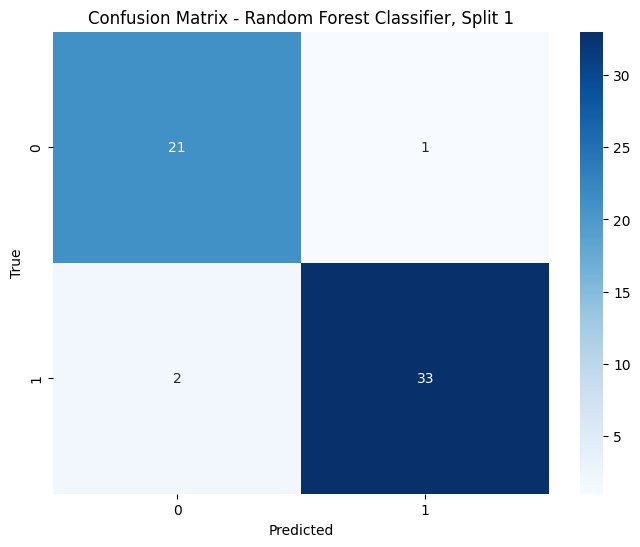


Output for split 2
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[22  0]
 [ 3 32]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.91      0.96        35

    accuracy                           0.95        57
   macro avg       0.94      0.96      0.95        57
weighted avg       0.95      0.95      0.95        57



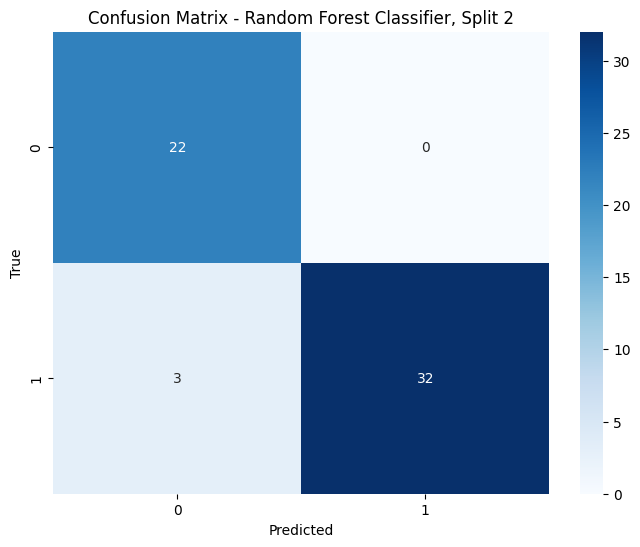


Output for split 3
50 out of 57 predictions correct
Accuracy: 0.8771929824561403
[[18  3]
 [ 4 32]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.91      0.89      0.90        36

    accuracy                           0.88        57
   macro avg       0.87      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57



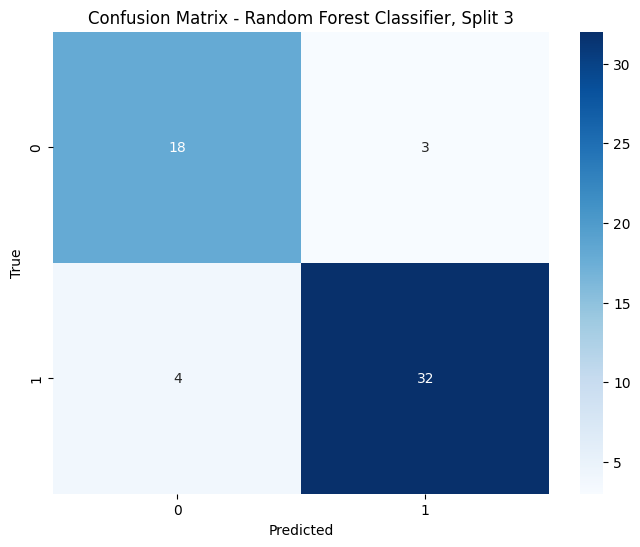


Output for split 4
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[19  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



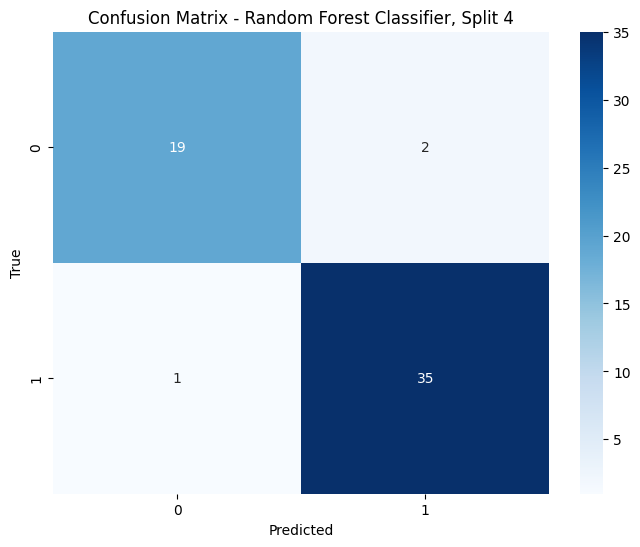


Output for split 5
49 out of 57 predictions correct
Accuracy: 0.8596491228070176
[[16  5]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        21
           1       0.87      0.92      0.89        36

    accuracy                           0.86        57
   macro avg       0.86      0.84      0.85        57
weighted avg       0.86      0.86      0.86        57



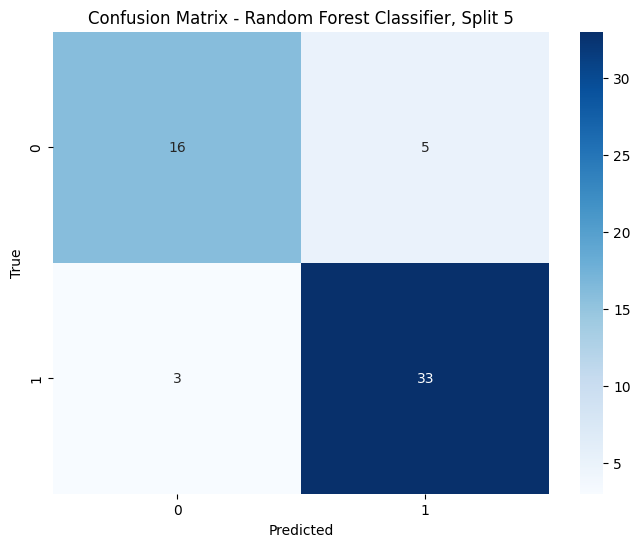


Output for split 6
49 out of 57 predictions correct
Accuracy: 0.8596491228070176
[[15  6]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.85      0.94      0.89        36

    accuracy                           0.86        57
   macro avg       0.87      0.83      0.84        57
weighted avg       0.86      0.86      0.86        57



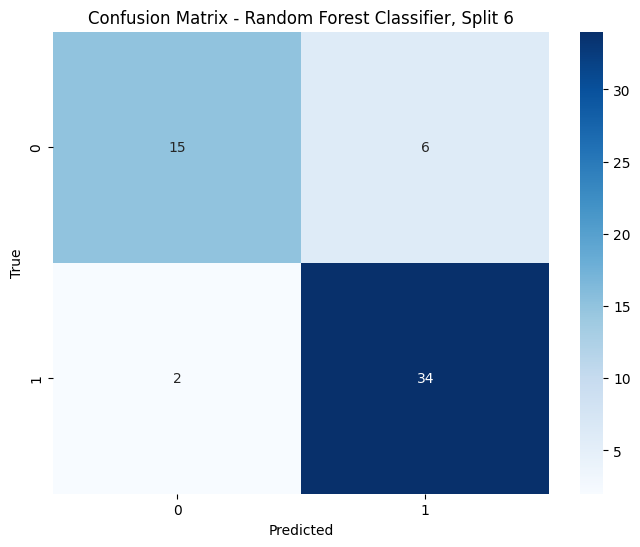


Output for split 7
55 out of 57 predictions correct
Accuracy: 0.9649122807017544
[[19  2]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.97        36

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



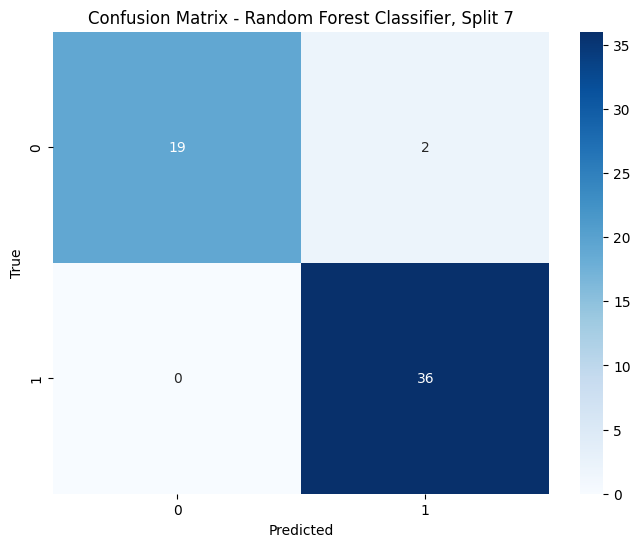


Output for split 8
55 out of 57 predictions correct
Accuracy: 0.9649122807017544
[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



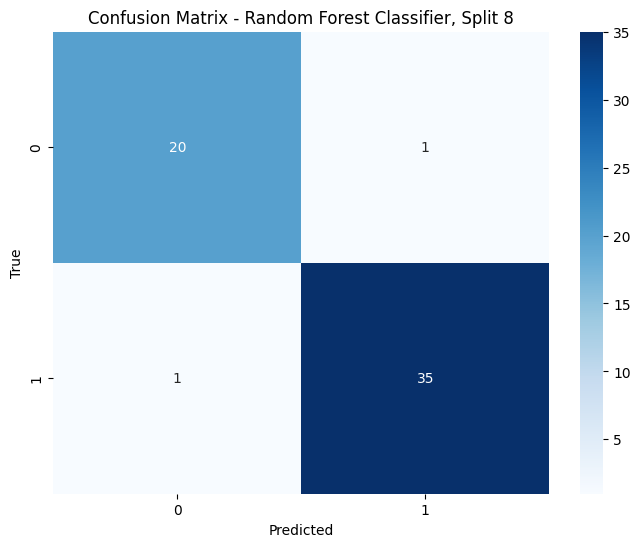


Output for split 9
51 out of 57 predictions correct
Accuracy: 0.8947368421052632
[[16  5]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.88      0.97      0.92        36

    accuracy                           0.89        57
   macro avg       0.91      0.87      0.88        57
weighted avg       0.90      0.89      0.89        57



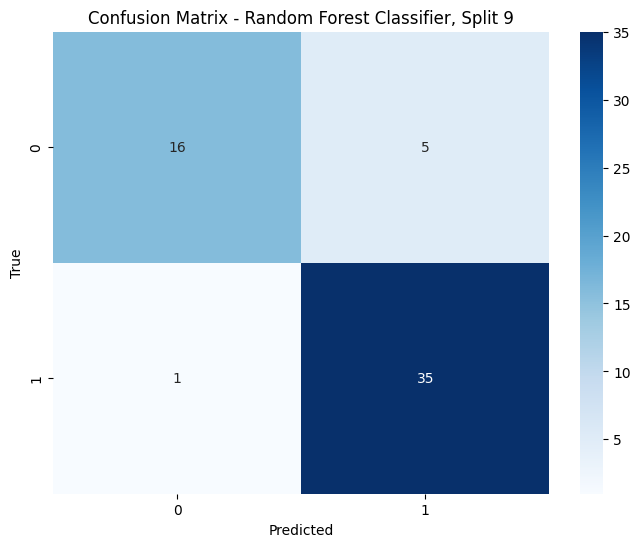


Output for split 10
52 out of 56 predictions correct
Accuracy: 0.9285714285714286
[[19  2]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        35

    accuracy                           0.93        56
   macro avg       0.92      0.92      0.92        56
weighted avg       0.93      0.93      0.93        56



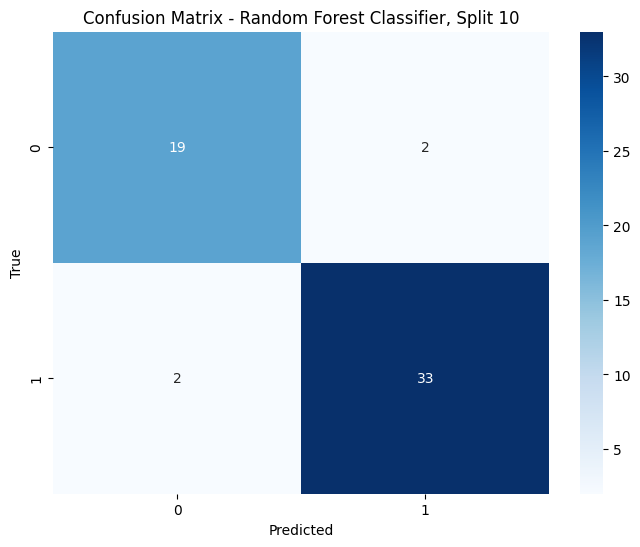


Final mean accuracy: 0.9191729323308271
Best single split accuracy: 0.9649122807017544


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load your dataset (make sure df1 is already defined)
# df1 = pd.read_csv(...)  # Already loaded above

# Check class distribution for 'diagnosis'
count_class_0, count_class_1 = df1['diagnosis'].value_counts()

# Separate classes
df_class_0 = df1[df1['diagnosis'] == 0]  # Benign
df_class_1 = df1[df1['diagnosis'] == 1]  # Malignant

print("Number of entries where 'diagnosis' is 0 (Benign):", df_class_0.shape[0])
print("Number of entries where 'diagnosis' is 1 (Malignant):", df_class_1.shape[0])

# Undersample majority class (Benign)
df_class_0_under = df_class_0.sample(count_class_1, random_state=42)

# Combine undersampled benign with malignant
df_balanced = pd.concat([df_class_0_under, df_class_1], axis=0)

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print('Random under-sampling:')
print(df_balanced['diagnosis'].value_counts())

# Features and target
X = df_balanced.drop('diagnosis', axis=1)
y = df_balanced['diagnosis']

# Stratified K-Fold CV
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"\nOutput for split {i}")

    # Train Random Forest
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Final summary
print("\nFinal mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))


In [10]:
from sklearn import metrics

# **Method2: Oversampling**

### 📈 Oversampling – Theory

Oversampling is a technique to balance class distribution by **increasing the number of samples** in the minority class.

#### 🔹 How It Works:
- Duplicate existing minority class samples (Random Oversampling), or
- Generate new synthetic samples (e.g., SMOTE).

#### ✅ Pros:
- No information loss from the majority class.
- Improves model sensitivity to minority class.

#### ⚠️ Cons:
- May lead to overfitting if using simple duplication.


In [11]:
# Assuming df_class_1 is the minority class (Malignant: diagnosis = 1)
# and df_class_0 is the majority class (Benign: diagnosis = 0)

# Oversample minority class to match majority
df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=42)

# Combine with majority class
df_oversampled = pd.concat([df_class_0, df_class_1_over], axis=0)

# Shuffle the combined dataset
df_oversampled = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify new class distribution
print('Random over-sampling:')
print(df_oversampled['diagnosis'].value_counts())


Random over-sampling:
diagnosis
1    357
0    212
Name: count, dtype: int64


In [12]:
# Verify the structure of the new oversampled DataFrame
print(df_oversampled.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None


In [13]:
X = df_oversampled.drop('diagnosis', axis='columns')
y = df_oversampled['diagnosis']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15, stratify=y
)


In [14]:
# Number of classes in training Data
y_train.value_counts()

,count
diagnosis,
1,285
0,170


Random over-sampling:
diagnosis
1    357
0    212
Name: count, dtype: int64
Output for split 1
55 out of 57 predictions correct
Accuracy: 0.9649122807017544
[[20  2]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.95      1.00      0.97        35

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



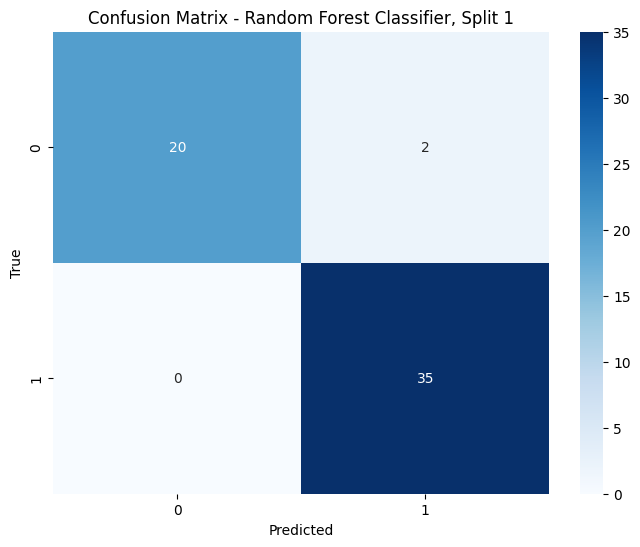

Output for split 2
52 out of 57 predictions correct
Accuracy: 0.9122807017543859
[[18  4]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.89      0.97      0.93        35

    accuracy                           0.91        57
   macro avg       0.92      0.89      0.90        57
weighted avg       0.92      0.91      0.91        57



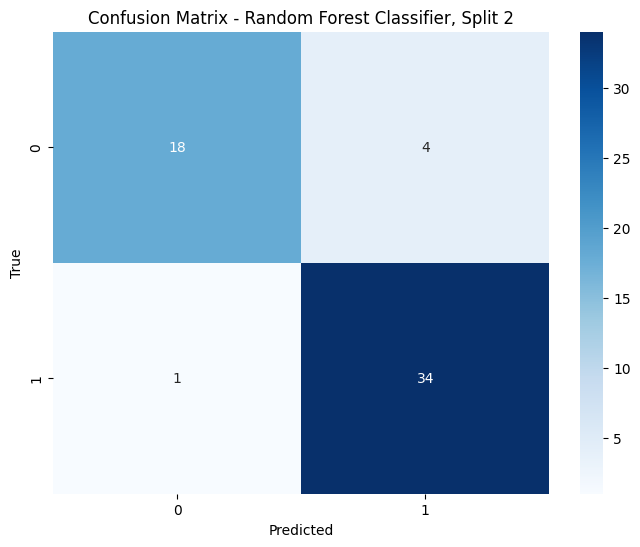

Output for split 3
53 out of 57 predictions correct
Accuracy: 0.9298245614035088
[[18  3]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.97      0.95        36

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



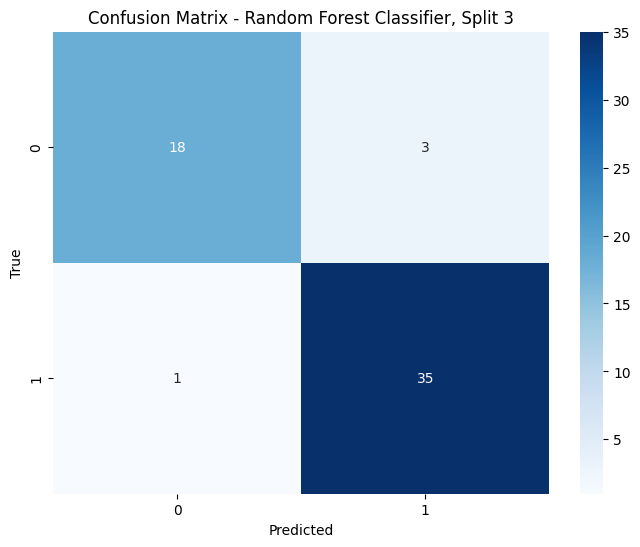

Output for split 4
56 out of 57 predictions correct
Accuracy: 0.9824561403508771
[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



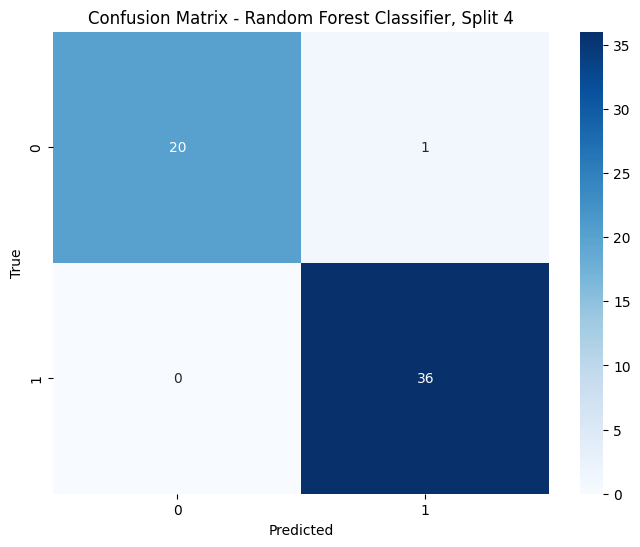

Output for split 5
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[19  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



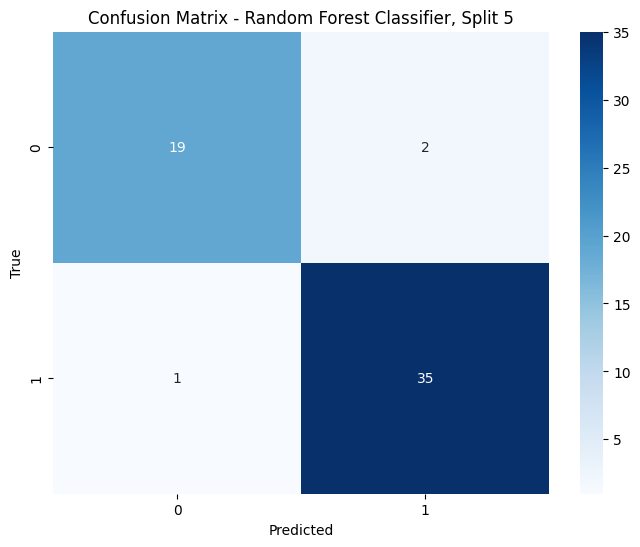

Output for split 6
56 out of 57 predictions correct
Accuracy: 0.9824561403508771
[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



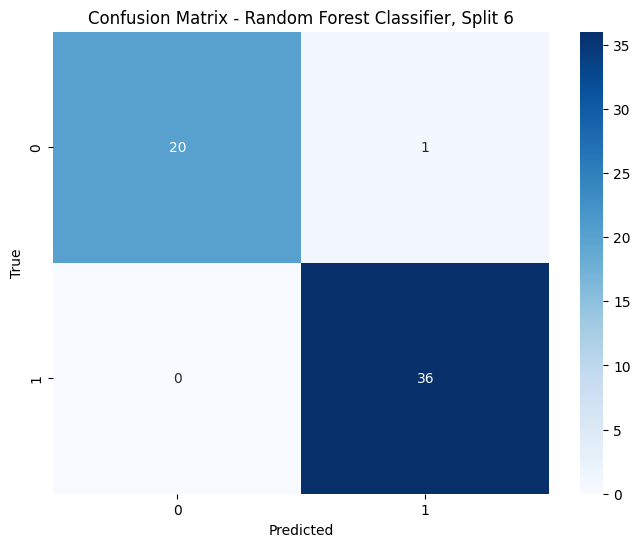

Output for split 7
55 out of 57 predictions correct
Accuracy: 0.9649122807017544
[[19  2]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.97        36

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



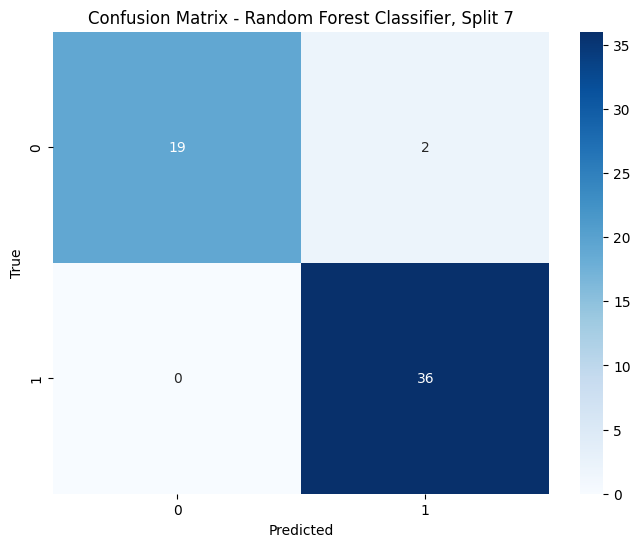

Output for split 8
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[18  3]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.92      1.00      0.96        36

    accuracy                           0.95        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57



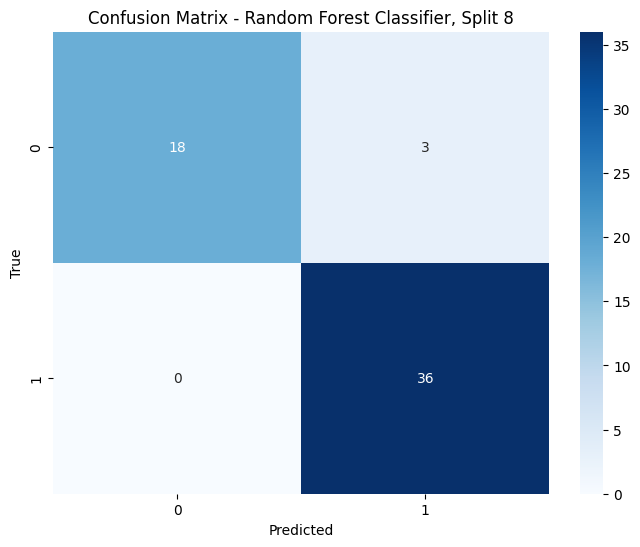

Output for split 9
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[19  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



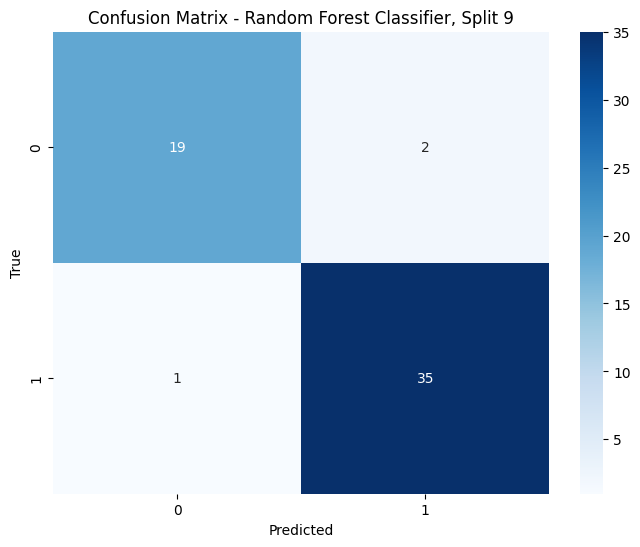

Output for split 10
54 out of 56 predictions correct
Accuracy: 0.9642857142857143
[[20  1]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        35

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56



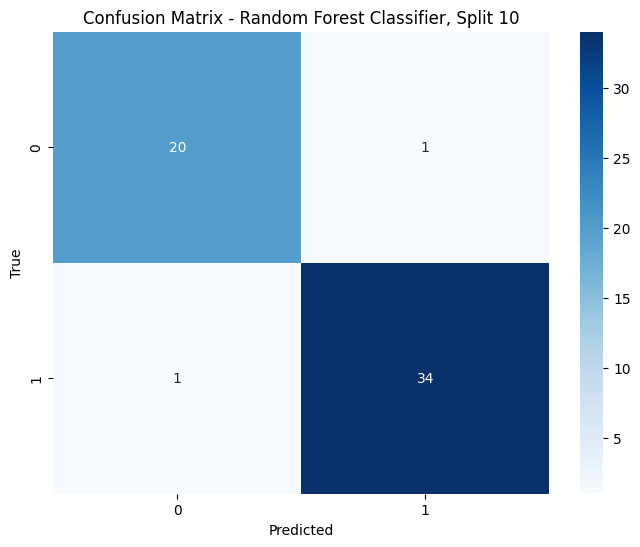

Final mean accuracy: 0.9543233082706767
Best single split accuracy: 0.9824561403508771


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df_class_1 is the minority class (diagnosis = 1)
# and df_class_0 is the majority class (diagnosis = 0)

# Oversample minority class to match majority
df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=42)

# Combine oversampled minority with majority class
df_oversampled = pd.concat([df_class_0, df_class_1_over], axis=0)

# Shuffle the dataset rows
df_oversampled = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

print('Random over-sampling:')
print(df_oversampled['diagnosis'].value_counts())

# Features and target
X = df_oversampled.drop('diagnosis', axis=1)
y = df_oversampled['diagnosis']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Output for split {i}")

    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

print("Final mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))
